In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
import matplotlib.patches as patches
import matplotlib as mpl
from mplsoccer import Pitch, VerticalPitch, FontManager, Sbopen, add_image
from matplotlib.font_manager import FontProperties
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.patheffects as path_effects
from highlight_text import ax_text, fig_text
from PIL import Image
from mplsoccer import add_image
from urllib.request import urlopen
import os


# Print the modified DataFrame
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

green = '#69f900'
red = '#ff4b44'
blue = '#00a0de'
violet = '#a369ff'
bg_color= '#f5f5f5'
line_color= '#000000'
col1 = '#ff4b44'
col2 = '#00a0de'

In [4]:
df = pd.read_csv(r"D:\FData\LaLiga_2024_25\till_gw9.csv")

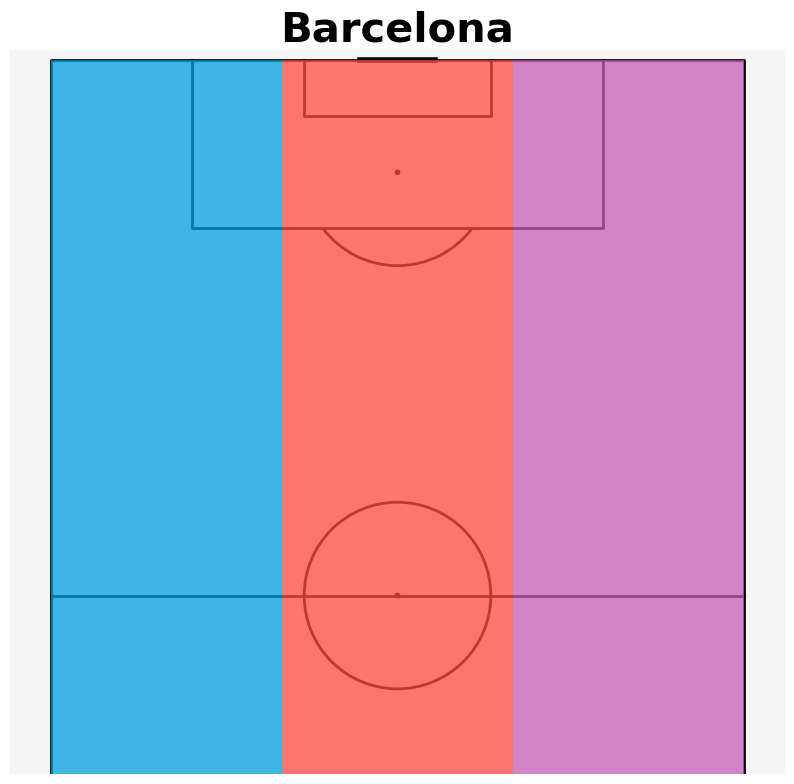

In [23]:
def plot_bp_zone(ax, team_name):
    dfp = df[(df['teamName']==team_name) & ((df['prog_pass']>9.11) | (df['prog_carry']>9.11)) & (df['outcomeType']=='Successful') &
             (~df['qualifiers'].str.contains('Corner|FreeKick'))]
    pitch = VerticalPitch(pitch_type='uefa', pitch_color=bg_color, line_color=line_color, linewidth=2)
    pitch.draw(ax=ax)
    ax.set_ylim(35, 106)
    left = dfp[dfp['x']>45.33]
    mid = dfp[(dfp['x']<=45.33) & (dfp['x']>=22.67)]
    right = dfp[dfp['x']<22.67]
    cmap = LinearSegmentedColormap.from_list("Pearl Earring - 10 colors", [col2, violet, col1], N=20)
    bin_statistic = pitch.bin_statistic(dfp.x, dfp.y, bins=(1,3), statistic='count', normalize=False)
    pitch.heatmap(bin_statistic, ax=ax, cmap=cmap, alpha=0.75, edgecolors='None')
    ax.set_title(team_name, fontsize=30, fontweight='bold')

fig,ax=plt.subplots(figsize=(10,10))
plot_bp_zone(ax, 'Barcelona')

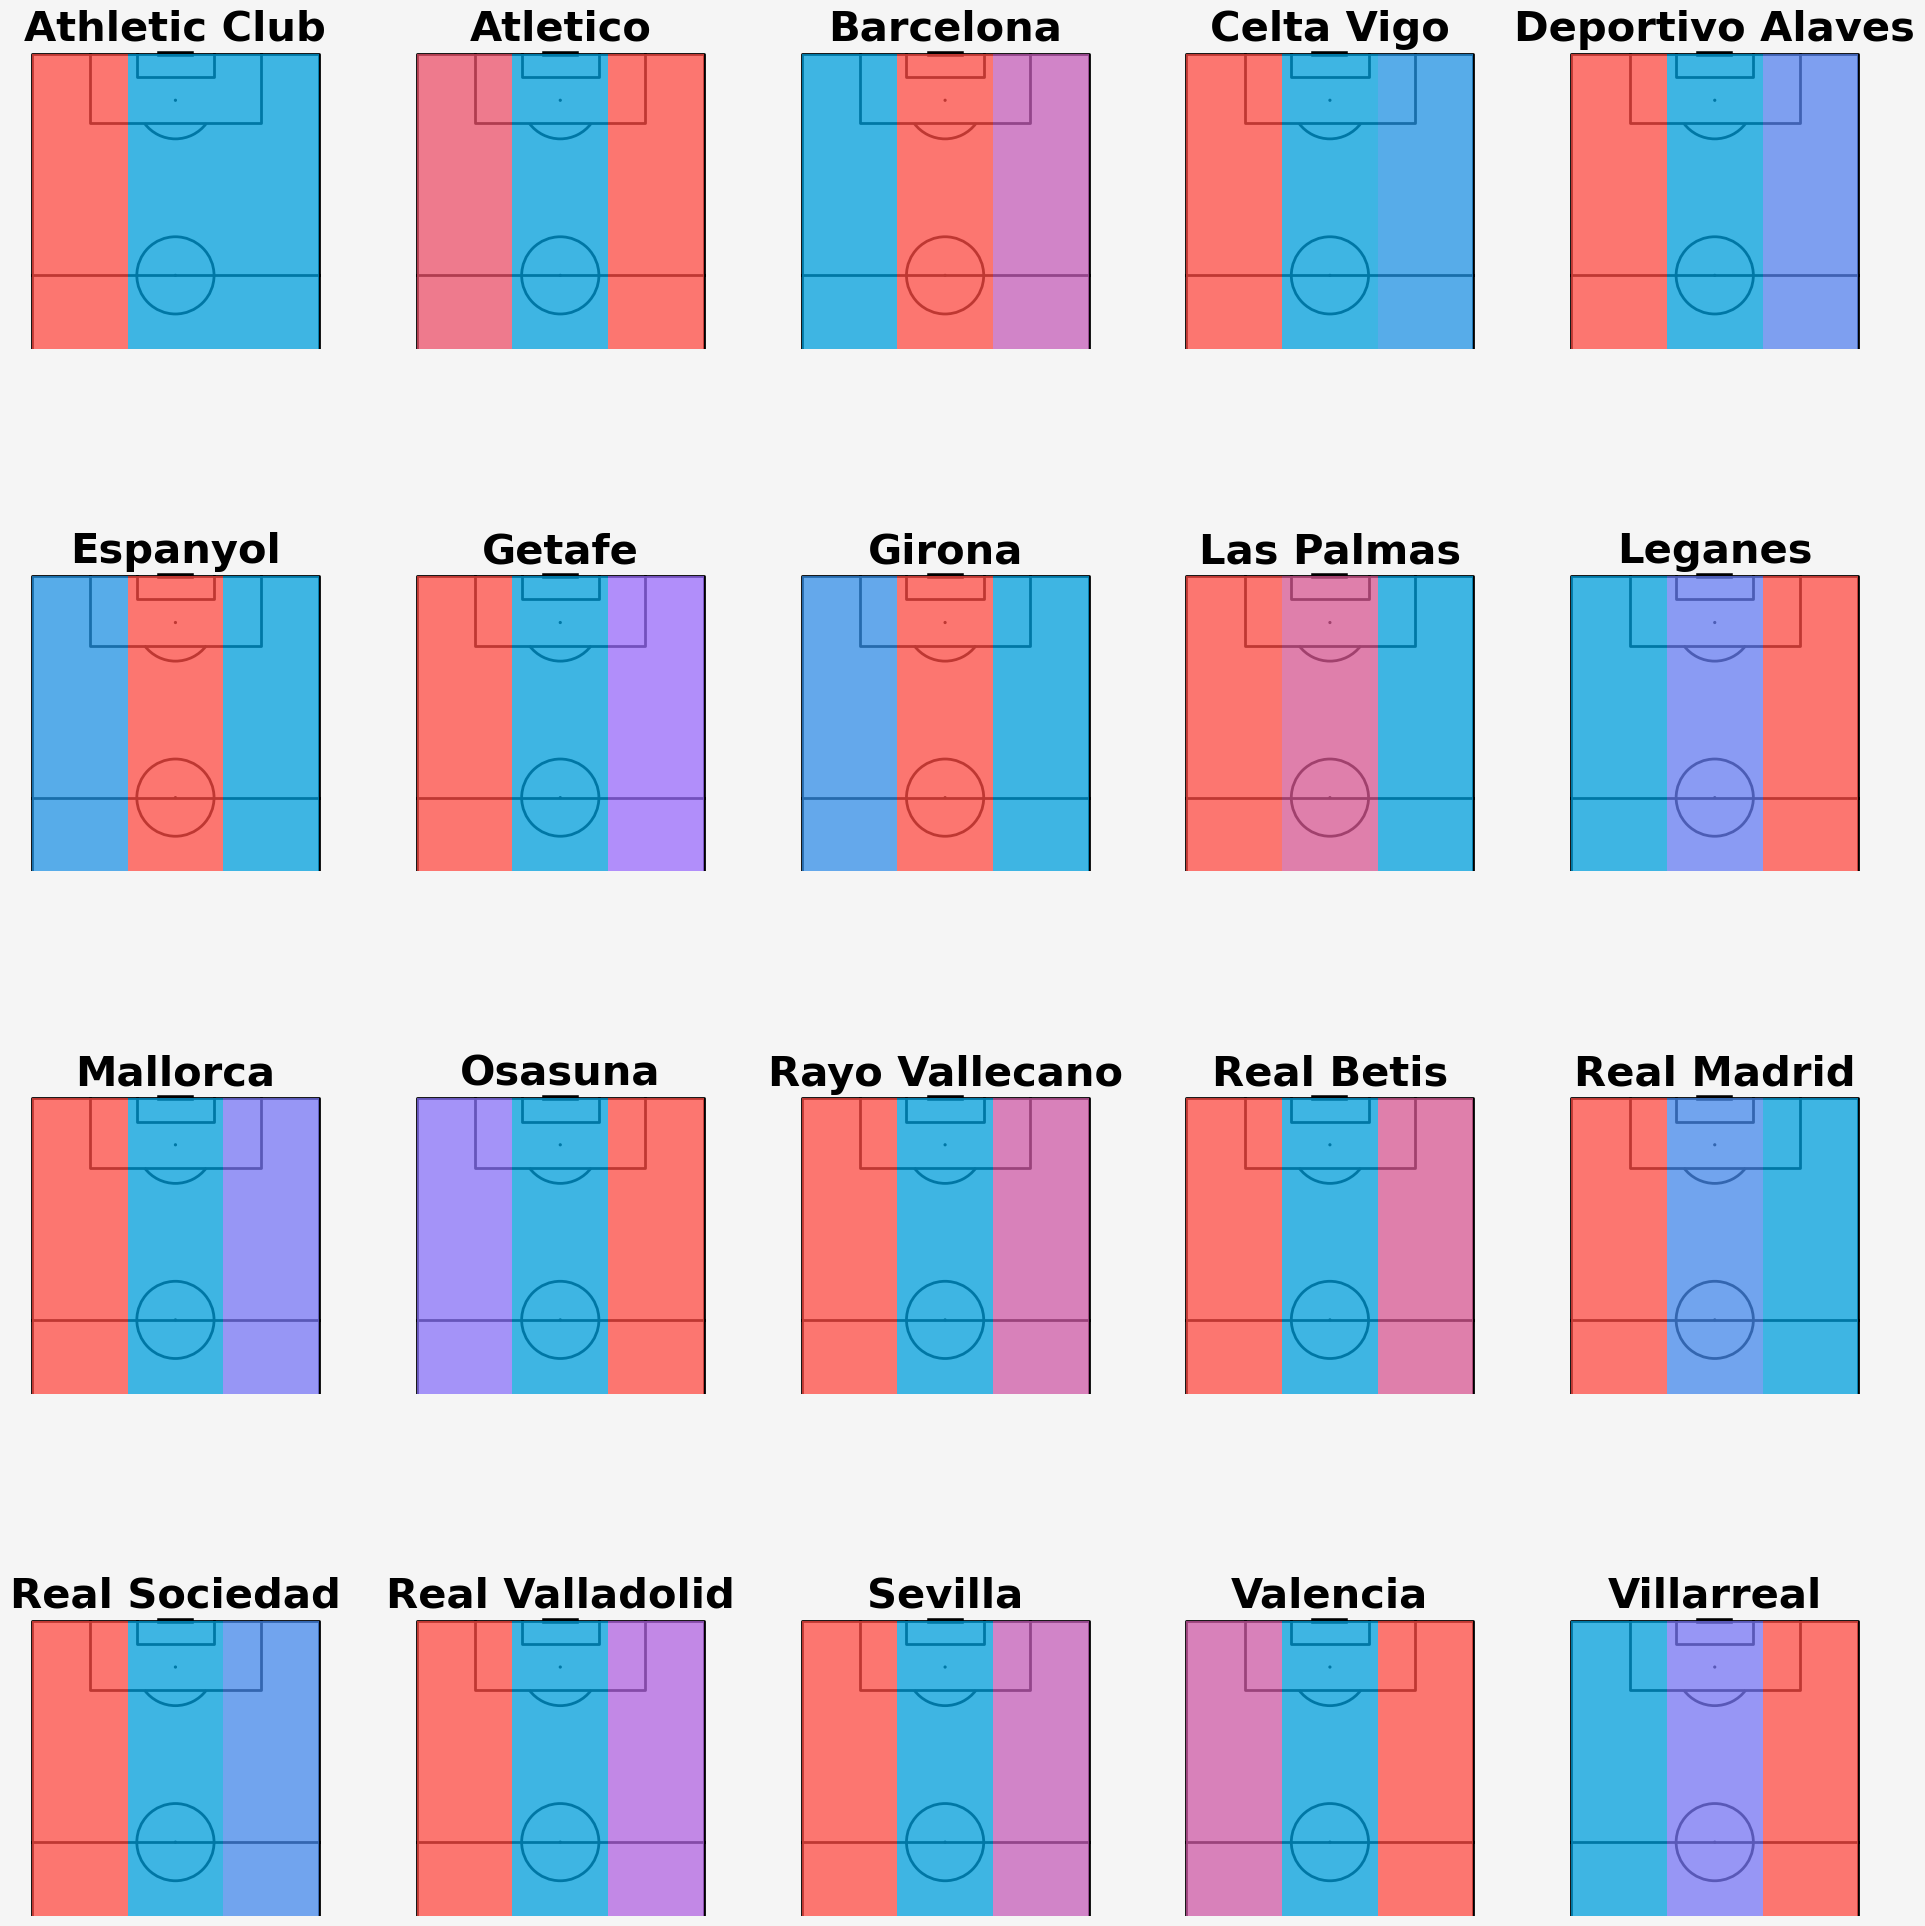

In [27]:
teamNames = sorted(df.teamName.unique())

fig, axes = plt.subplots(nrows=4, ncols=5, figsize=(24, 26), facecolor=bg_color)

# Flatten the axes array to easily loop through it
axes = axes.ravel()

# Loop through the sorted team names and corresponding axes
for i, team_name in enumerate(teamNames):
    plot_bp_zone(axes[i], team_name)